In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data

In [2]:
path = "../data/water_dataset_reshaped.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,0.648148
1,1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,0.648148
2,2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,0.648148
3,3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,0.638889
4,4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,0.648148


# Dropping unused column

In [3]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,0.648148
1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,0.648148
2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,0.648148
3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,0.638889
4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,0.648148


# Adding categorical variables to data

In [4]:
categorical = ["Hardness", "Mineral content"]
hardness = ["soft", "hard"]
hardness_prob = [0.4, 0.6]
mineral = ["low", "high"]
mineral_prob = [0.8, 0.2]

hardness_sample = np.random.choice(hardness, size=len(df), p=hardness_prob)
mineral_sample = np.random.choice(mineral, size=len(df), p=mineral_prob)

df["Hardness"] = hardness_sample
df["Mineral content"] = mineral_sample

In [5]:
columns = [col for col in df if col != 'Target'] + ['Target']
df = df[columns]
df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Hardness,Mineral content,Target
0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,soft,low,0.648148
1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,soft,low,0.648148
2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,hard,high,0.648148
3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,hard,high,0.638889
4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,hard,low,0.648148


# Distribution of categorical variables

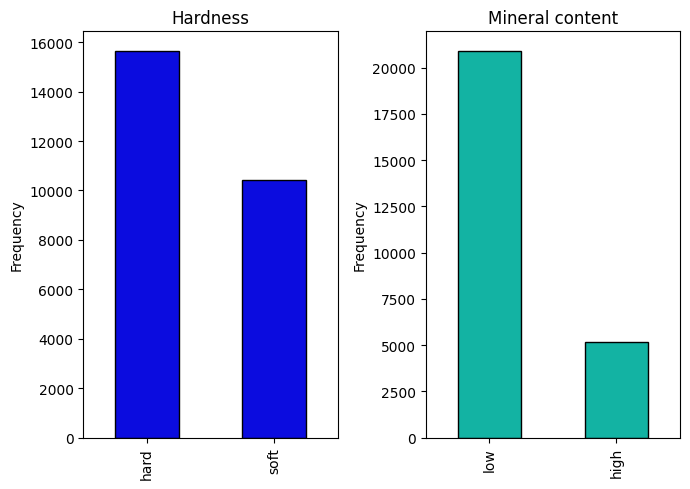

In [6]:
def random_color():
    return (np.random.random(), np.random.random(), np.random.random())

fig, axes = plt.subplots(1, 2, figsize=(7, 5))
axes = axes.flatten()

for idx, c in enumerate(categorical):
    category_counts = df[c].value_counts()
    category_counts.plot(kind='bar', ax=axes[idx], color=random_color(), edgecolor="black")
    axes[idx].set_title(c)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Calculating means, z values, kurtosis and skewness of continuous variables

In [7]:
def calculate_excess_kurtosis(n, z_values):
    coef = (n*(n+1)) / ((n-1)*(n-2)*(n-3))
    z_sum = np.sum(z_values**4)
    substractor = (3*(n-1)**2) / ((n-2)*(n-3))
    kurtosis = coef * z_sum - substractor
    return kurtosis

def calculate_skewness(n, z_values):
    coef = n / ((n-1)*(n-2))
    z_sum = np.sum(z_values**3)
    skewness = coef * z_sum
    return skewness

def get_kurtosis_interpretation(kurtosis):
    if kurtosis > 7.5:
        return "High kurtosis, heavy tails"
    elif kurtosis >= 0:
        return "Moderate kurtosis, close to normal dist"
    else:
        return "Low kurtosis, light tails, flatter dist"
    
def get_skewness_interpretation(skewness):
    if skewness > 0.05:
        return "Right skewed distribution, right tail"
    elif skewness >= 0:
        return "Relatively symmetrical, normal-like"
    else:
        return "Left skewed distribution, left tail"

In [8]:
continuous_columns = list(df.columns[:11]) + ["Target"]

kurtosis_list = []
skewness_list = []
means_list = []
z_values_list = []

for c in continuous_columns:
    mean = df[c].mean()
    std = df[c].std()
    z_values = (df[c] - mean) / std
    kurtosis = calculate_excess_kurtosis(len(df[c]), z_values)
    skewness = calculate_skewness(len(df[c]), z_values)
    kurtosis_data = {"kurtosis": np.round(kurtosis, 3), "interpretation": get_kurtosis_interpretation(kurtosis)}
    skewness_data = {"skewness": np.round(skewness, 3), "interpretation": get_skewness_interpretation(skewness)}
    kurtosis_list.append(kurtosis_data)
    skewness_list.append(skewness_data)
    means_list.append(float(np.round(mean, 3)))
    z_values_list.append(z_values)

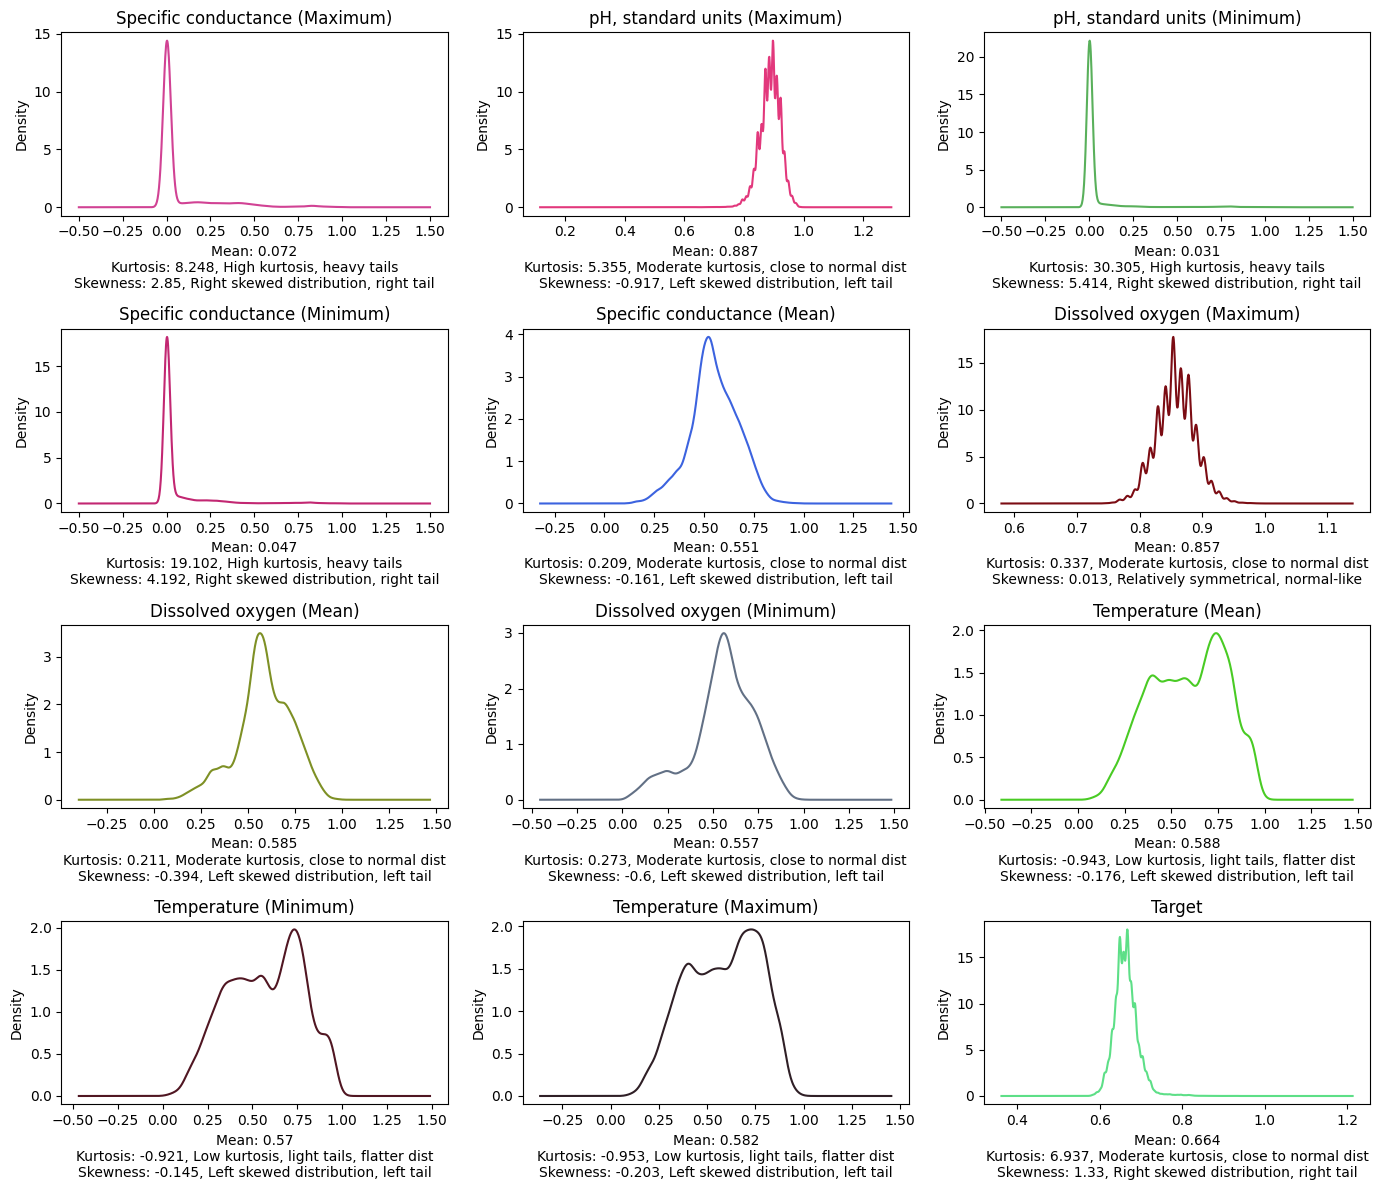

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(14, 12))
axes = axes.flatten()

for idx, c in enumerate(continuous_columns):
    df[c].plot(kind='density', ax=axes[idx], color=random_color())
    axes[idx].set_title(c)
    mean_string = f'Mean: {means_list[idx]}'
    kurtosis_string = f'Kurtosis: {kurtosis_list[idx]["kurtosis"]}, {kurtosis_list[idx]["interpretation"]}'
    skewness_string = f'Skewness: {skewness_list[idx]["skewness"]}, {skewness_list[idx]["interpretation"]}'
    x_string = mean_string + "\n" + kurtosis_string + "\n" + skewness_string
    axes[idx].set_xlabel(x_string)

plt.tight_layout()
plt.show()

# Correlation with target variable

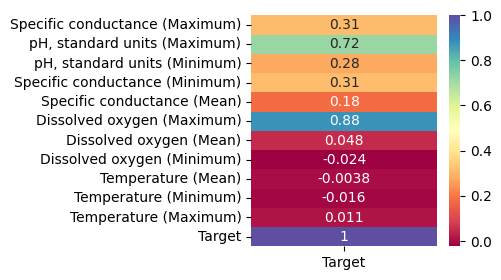

In [10]:
target_corr = df[continuous_columns].corr()["Target"]
values = target_corr.values.reshape(-1, 1)

plt.figure(figsize=(3, 3))
sns.heatmap(values, annot=True, yticklabels=target_corr.index, xticklabels=["Target"] ,cmap="Spectral")
plt.show()

# Correlation using categorised z-values with target variable

In [19]:
z_values_df = pd.DataFrame(z_values_list).T
z_values_df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,-0.418730,-0.077239,-0.244328,-0.336285,1.058496,-0.506095,1.230028,1.330990,-1.469916,-1.301145,-1.637841,-0.522708
1,-0.418498,-0.439543,-0.244006,-0.335999,1.278365,-0.897377,1.281808,1.376548,-1.469916,-1.285785,-1.637841,-0.522708
2,-0.417572,-0.077239,-0.243685,-0.335285,1.058496,-0.114812,1.126469,1.148759,-1.438729,-1.301145,-1.575507,-0.522708
3,-0.341756,-0.801847,-0.243363,-0.315708,1.223398,-0.897377,1.281808,1.239874,-1.454322,-1.316505,-1.622258,-0.837804
4,0.097747,-0.801847,-0.165414,-0.130093,1.113463,-0.114812,1.230028,1.148759,-1.454322,-1.331865,-1.606674,-0.522708


In [ ]:
categorised_df = pd.DataFrame([pd.cut(z_values_df[c], [float("-inf"), -3, 3, float("inf")]) for c in z_values_df.columns]).T
categorised_df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
1,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
2,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
3,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
4,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"


In [22]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

for c in categorised_df.columns:
    categorised_df[c] = encode.fit_transform(categorised_df[c])

categorised_df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,0,1,0,0,1,1,1,1,0,0,0,1
1,0,1,0,0,1,1,1,1,0,0,0,1
2,0,1,0,0,1,1,1,1,0,0,0,1
3,0,1,0,0,1,1,1,1,0,0,0,1
4,0,1,0,0,1,1,1,1,0,0,0,1


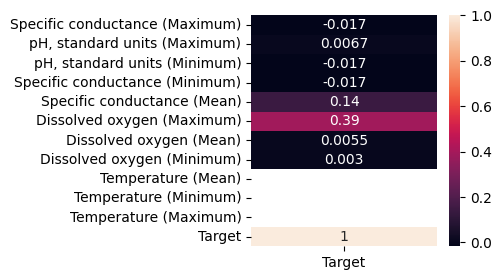

In [24]:
target_corr_cat = categorised_df.corr()["Target"]
values = target_corr_cat.values.reshape(-1, 1)

plt.figure(figsize=(3, 3))
sns.heatmap(values, annot=True, yticklabels=target_corr.index, xticklabels=["Target"])
plt.show()

In [25]:
values

array([[-0.01661012],
       [ 0.00669777],
       [-0.01678486],
       [-0.01666021],
       [ 0.14173389],
       [ 0.38867165],
       [ 0.00548811],
       [ 0.00301605],
       [        nan],
       [        nan],
       [        nan],
       [ 1.        ]])

In [ ]:
stats.pointbiserialr(df['gender'], df['MonthlyCharges'])